In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('seaborn-data/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic = titanic.drop(['sibsp','parch','fare','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1)
titanic.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [4]:
titanic.describe()

,survived,pclass,age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [5]:
titanic = titanic.dropna(axis=0)

In [6]:
titanic.shape
titanic.describe()

,survived,pclass,age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [7]:
r = titanic.groupby('pclass').corr()

<AxesSubplot:>

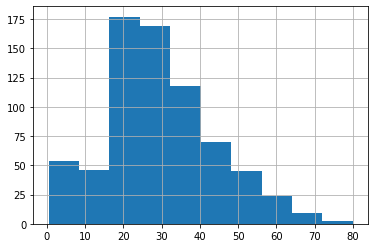

In [12]:
titanic['age'].hist()

<AxesSubplot:>

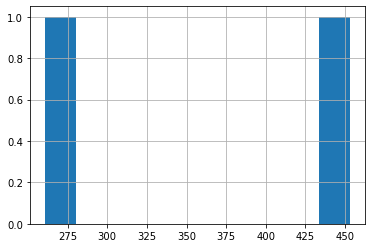

In [13]:
titanic['sex'].value_counts().hist()

In [25]:
titanic.groupby(['sex','pclass']).agg('survived')

sex     pclass
female  1         0.964706
        2         0.918919
        3         0.460784
male    1         0.396040
        2         0.151515
        3         0.150198
Name: survived, dtype: float64

# Exercice

In [83]:
titanic.loc[titanic['age'] <= 20,'age'] = 0
titanic.loc[(titanic['age'] > 20 )& (titanic['age'] <=30) , 'age'] = 1
titanic.loc[(titanic['age'] > 30)&(titanic['age']<=40),'age'] = 2
titanic.loc[titanic['age'] > 40 ,'age'] = 3

In [84]:
titanic['age'].value_counts()

1.0    230
0.0    179
2.0    155
3.0    150
Name: age, dtype: int64

In [85]:
#def catage(age):
#     if age < 20:
#         return '<20'
#     elif age > 20 & age < 30:
#         return 'Compris entre 20 et 30'
#     elif age > 30 & age <40:
#         return 'Compris entre 30 et 40'
#     elif age > 40:
#         return '> 40' 

# titanic['age'].map(catage)
# Transformer une colonne remplie en nombres numériques
# titanic['sex'].astype('category').cat.codes
# titanic['sex'].map({'male':0,'female':1})

# Exercice : Bitcoin Analyse

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [87]:
btc = pd.read_csv('data/BTC-EUR.csv',index_col='Date',parse_dates=True)
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624.0


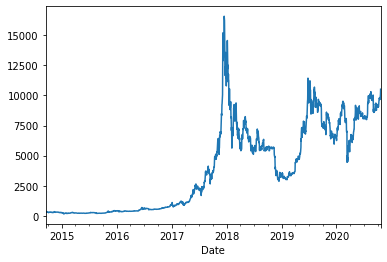

In [88]:
btc['Close'].plot()

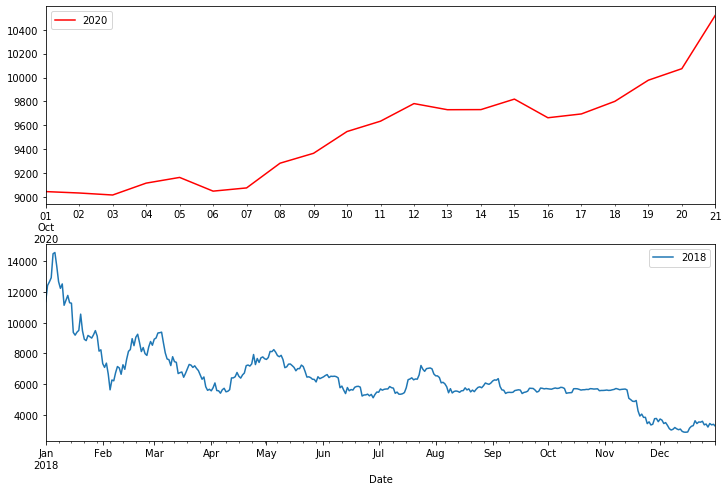

In [89]:
#resample permet de regrouper des données par fréquence
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
btc.loc['2020-10','Close'].plot(label='2020',c='r')
# btc.loc['2020','Close'].resample('M').mean().plot(ls=':',lw=3,label='Moyene par mois')
# btc.loc['2020','Close'].resample('W').mean().plot(ls='--',lw=3,label='Moyenne par semaie')
plt.legend()
plt.subplot(2,1,2)
btc.loc['2018','Close'].plot(label='2018')
plt.legend()

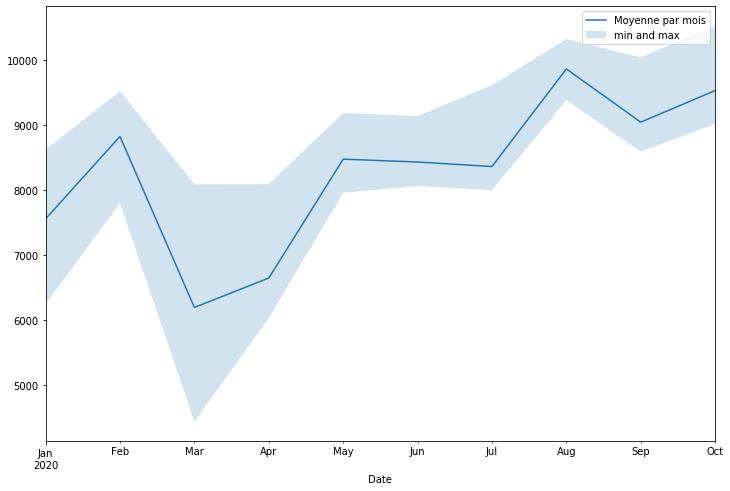

In [90]:
# aggregate (agg) permet de rassembler dans un seul tableau plusieurs échantillons par dessus resample
f = btc.loc['2020','Close'].resample('M').agg(['mean','std','min','max'])
plt.figure(figsize=(12,8))
f['mean'].plot(label='Moyenne par mois')
plt.fill_between(f.index,f['max'],f['min'],label='min and max',alpha=0.2)
plt.legend()

In [91]:
# Moving average permet de calculer la moyenne sur une colonne donnée , sur un certain nombre de valeurs
# mais il est mieux d'utilisetr la moyenne mobile

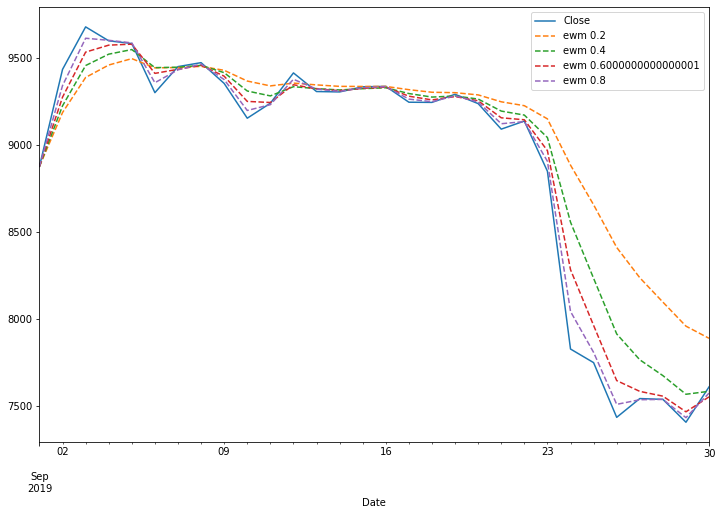

In [92]:
plt.figure(figsize=(12,8))
btc.loc['2019-09','Close'].plot()
for i in np.arange(0.2,1,0.2):
    btc.loc['2019-09','Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}',ls='--')
plt.legend()
plt.show()

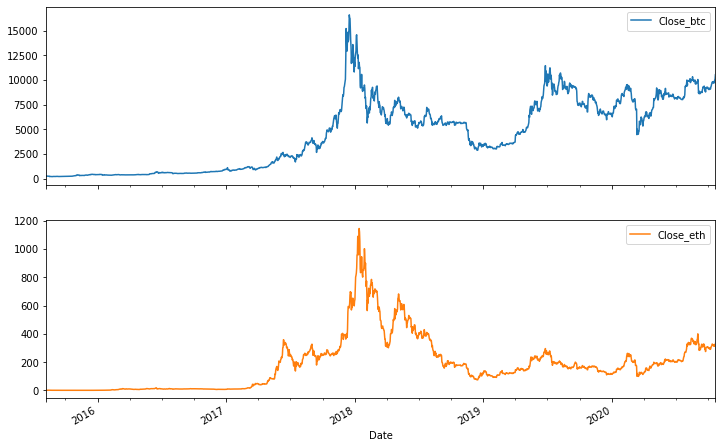

In [93]:
# Merge pour rassembler deux datasets
eth = pd.read_csv('data/ETH-EUR.csv',index_col='Date',parse_dates=True)
btc_eth = pd.merge(btc,eth,on='Date',how='inner',suffixes=('_btc','_eth'))
btc_eth[['Close_btc','Close_eth']].plot(figsize=(12,8),subplots=True)
plt.show()

In [94]:
btc_eth[['Close_btc','Close_eth']]['2016':'2018'].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.890508
Close_eth,0.890508,1.000000


In [95]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389165.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560102.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736825.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702624.0


#  Exercice d'Analyse Trading

In [108]:
btcopy = btc.copy()
btcopy['Buy'] = np.zeros(len(btcopy))
btcopy['Sell'] = np.zeros(len(btcopy))


In [109]:
btcopy['RollingMax'] = btcopy['Close'].shift(1).rolling(window=28).max()
btcopy['RollingMin'] = btcopy['Close'].shift(1).rolling(window=28).min()
btcopy.loc[btcopy['Close'] > btcopy['RollingMax'],'Buy'] = 1
btcopy.loc[btcopy['Close'] < btcopy['RollingMin'],'Sell'] = -1

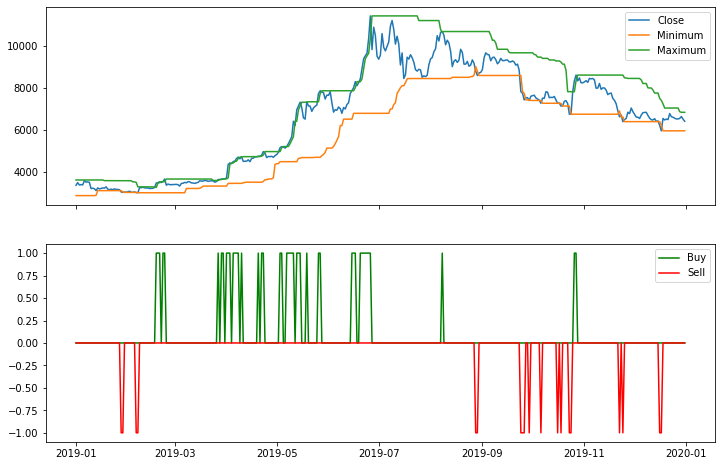

In [111]:
debut = '2019'
fin = '2019'
fig , axe = plt.subplots(2,figsize=(12,8),sharex=True)
axe[0].plot(btcopy['Close'][debut:fin])
axe[0].plot(btcopy['RollingMin'][debut:fin])
axe[0].plot(btcopy['RollingMax'][debut:fin])
axe[0].legend(['Close','Minimum','Maximum'])
axe[1].plot(btcopy['Buy'][debut:fin],c='g')
axe[1].plot(btcopy['Sell'][debut:fin],c='r')
axe[1].legend(['Buy','Sell'])